# IBM Python

## Module 5 Model Evaluation and Refinement

** Key points:**

<p></p>
<li><a href="#ref1">Model Evaluation </a></li>
<li><a href="#ref2">Over-fitting, Under-fitting and Model Selection </a></li>
<li><a href="#ref3">Ridge Regression </a></li>
<li><a href="#ref4">Grid Search</a></li>
<p></p>

In [4]:
import pandas as pd
import numpy as np

# Import clean data 
path = path='https://ibm.box.com/shared/static/q6iiqb1pd7wo8r3q28jvgsrprzezjqk3.csv'
df = pd.read_csv(path)

In [5]:
# First let's only use numeric data: 
df = df._get_numeric_data()

In [6]:
# Libraries for plotting:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
print("done")

done


C:\Users\DI\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [7]:
# define plotting function

# distribution
def Distributionplot(RedF, BlueF, RedN, BlueN, Title):
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedF, hist=False, color='r',label=RedN)
    ax2 = sns.distplot(BlueF, hist=False, color='b',label=BlueN)
    
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    
    plt.show()
    plt.close()
    

In [56]:
# polynomial plot
def PollyPlot(xtrain,xtest,ytrain,ytest,lr,poly_transform):
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
    
    width = 8
    height = 6
    plt.figure(figsize=(width,height))
    
    # take the range and interval of x
    xmax = max([xtrain.values.max(),xtest.values.max()])
    xmin = min([xtrain.values.min(),xtest.values.min()])
    x = np.arange(xmin,xmax,0.1)
    
    #plotting
    plt.plot(xtrain,ytrain,'ro',label='Training Data')
    plt.plot(xtest,ytest,'go',label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend()

### 1.Training and Testing 

In [9]:
# set price as y
y_data = df['price']
# drop price in x
x_data = df.drop('price',axis=1)

In [10]:
# Now we randomly split our data into training and testing data using the function train_test_split:
from sklearn.model_selection import train_test_split
# use 10% of data for testing
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.1,random_state=1)
# random_state = ? does not matter, the same value gives the same array. random_state=1 or 0 give dif array.

print('# of training samples:',x_train.shape[0])
print('# of test samples:',x_test.shape[0])

('# of training samples:', 180)
('# of test samples:', 21)


In [11]:
# import linear regression
from sklearn.linear_model import LinearRegression
# create an object
lre = LinearRegression()
#fit the model w/ the feature 'horsepower'
lre.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# R^2 of test data
lre.score(x_test[['horsepower']],y_test)

0.36358755750788241

In [13]:
# R^2 of training data
lre.score(x_train[['horsepower']],y_train)

0.66197241975151033

For 10% as test_size, R^2 is smaller for test data. But
test_size=0.15 is a singularity which give higher R^2 for test data.

**Cross-validation Score**

Sometimes you do not have sufficient testing data. As such, you may want to perform Cross-validation.

#### What is Cross-valiadation?
The **general procedure** is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
    - Take the group as a hold out or test data set
    - Take the remaining groups as a training data set
    - Fit a model on the training set and evaluate it on the test set
    - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores

#### How to choose appropriate K?

Three common tactics for choosing a value for k are as follows:

- Representative: The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.
- k=10: The value for k is fixed to 10, a value that has been found through experimentation to generally result in a model skill estimate with low bias a modest variance.
- k=n: The value for k is fixed to n, where n is the size of the dataset to give each test sample an opportunity to be used in the hold out dataset. This approach is called leave-one-out cross-validation.

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
# We input the object, the feature in this case ' horsepower', the target data (y_data). 
#The parameter 'cv' determines the number of folds; in this case 4:
Rcross = cross_val_score(lre,x_data[['horsepower']],y_data,cv=4)
Rcross

array([ 0.7746232 ,  0.51716687,  0.74785353,  0.04839605])

In [16]:
# calculate the average and standard deviation of our estimate:
print "mean of the folds:", Rcross.mean()
print "std of the folds:",Rcross.std()

mean of the folds: 0.522009915042
std of the folds: 0.291183944476


In [17]:
# use negative squared error as a score by setting the parameter 
# 'scoring' metric to 'neg_mean_squared_error':
-1*cross_val_score(lre,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')

array([ 20254142.84026704,  43745493.26505169,  12539630.34014931,
        17561927.72247591])

In [18]:
# Calculate the average R^2 using two folds, find the average R^2 for 
# the second fold utilizing the horsepower as a feature :
Rcross1=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rcross1

array([ 0.59015621,  0.44319613])

In [19]:
print "mean of the folds:", Rcross1.mean()
print "std of the folds:",Rcross1.std()

mean of the folds: 0.516676169713
std of the folds: 0.0734800419577


In [20]:
y_data.shape

(201L,)

In this case, cv=4 is a boundary value. cv>4 leads to negative mean of the folds. **Why?**

In [33]:
# use the function 'cross_val_predict' to predict the output
# The function splits up the data into the specified number of folds, 
# using one fold to get a prediction while the rest of the folds are used as test data.
from sklearn.model_selection import cross_val_predict
yh = cross_val_predict(lre,x_data[['horsepower']],y_data,cv=4)
print yh.max()
print yh.min()
print yh.std()


37573.5236589
3780.33144805
6350.65437514


In [34]:
# check those without cross-validation
yl = lre.predict(x_data[['horsepower']])
print yl.max()
print yl.min()
print yl.std()

40697.1283926
3713.34478592
6441.5095053


This means without cross-valiadation, the range of prediction tends to be larger, and more varaint.

### 2. Overfitting, Underfitting and Model Selection

#### 1) Overfitting -- MLR & Polynomial

In [35]:
# Let's create Multiple linear regression objects and train the model using 
# 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features:
mlr = LinearRegression()
mlr.fit(x_train[['horsepower', 'curb-weight', 'engine-size','highway-mpg']], y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
# Prediction using training data:
yh_train = mlr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yh_train[0:5]

array([  7426.6731551 ,  28323.75090803,  14213.38819709,   4052.34146983,
        34500.19124244])

In [38]:
# Prediction using test data:
yh_test=mlr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yh_test[0:5]

array([ 11349.35089149,   5884.11059106,  11208.6928275 ,   6641.07786278,
        15565.79920282])

In [39]:
# Let's perform some model evaluation using our training and testing data separately. 
# First we import the seaborn and matplotlibb library for plotting:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

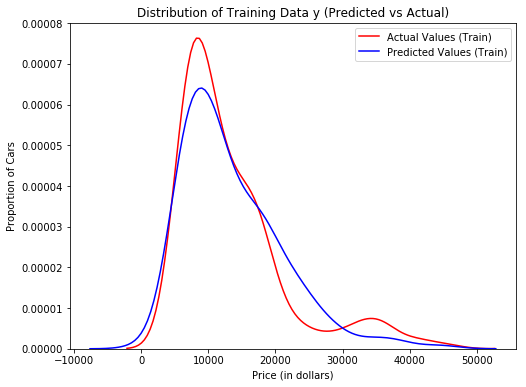

In [41]:
# examine the distribution of the predicted values of the training data:
# Use plotting functions
Title='Distribution of Training Data y (Predicted vs Actual)'
Distributionplot(y_train,yh_train,"Actual Values (Train)","Predicted Values (Train)",Title)

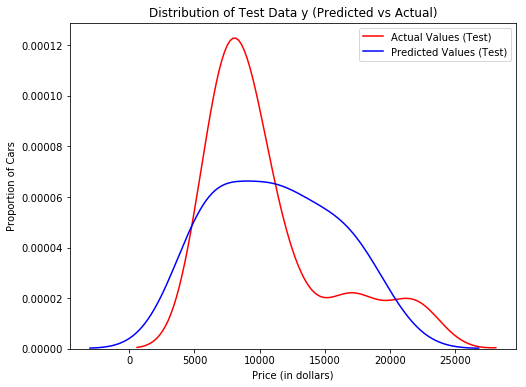

In [42]:
# Let's try with test data
Title='Distribution of Test Data y (Predicted vs Actual)'
Distributionplot(y_test,yh_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Prediction over training set is much better than test set. Meaning the MLR might be overfitting?

In [43]:
# Let's try with polynomial features
from sklearn.preprocessing import PolynomialFeatures
print("done")

done


In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
print("done")

done


In [76]:
# use 5 degree polynomial features and horsepower as single predictor
# first transform it into polynomial features 
pr=PolynomialFeatures(degree=5)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [77]:
# fit with polynomial features using train set
poly=LinearRegression()
poly.fit(x_train_pr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
# make prediction with test set
yh_p=poly.predict(x_test_pr )
yh_p[0:5]

array([  7469.54994504,   7857.05707897,  11437.68400766,  21006.61732314,
        21825.39817162])

In [79]:
# quick compare of the prediction on test data
print("Predicted values:", yh_p[0:4])
print("True values:",y_test[0:4].values)

('Predicted values:', array([  7469.54994504,   7857.05707897,  11437.68400766,  21006.61732314]))
('True values:', array([  6295.,  10698.,  13860.,  13499.]))


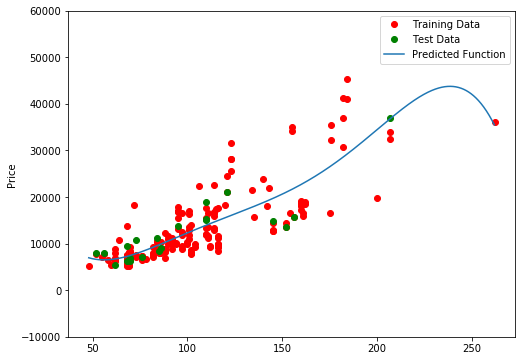

In [80]:
PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

In [81]:
# check polynomial model performance
# R^2 of the training data:
print poly.score(x_train_pr,y_train)
# R^2 of the test data:
print poly.score(x_test_pr, y_test)

0.663353900416
0.797913489392



This is differnt from the example in original lab, where test_size=0.45, and the score for test data is negative, suggesting overfitting. In this case, when test_size=0.1, the results is not too bad.

In [82]:
lr = LinearRegression()

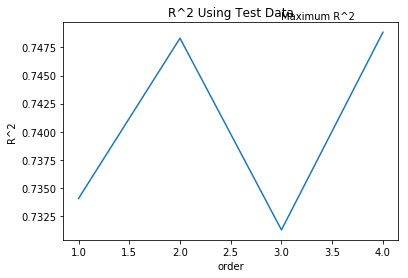

In [83]:
# Let's see how the R^2 changes on the test data for different order polynomials and plot the results:
Rsqu_test=[]

order=[1,2,3,4]
for n in order:
    pr=PolynomialFeatures(degree=n)
    
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr=pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr,y_train)
    
    Rsqu_test.append(lr.score(x_test_pr,y_test))

plt.plot(order,Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Again, the R^2 is quite different from the lab. Test_size is very critical! 

In [85]:
def f(order,test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr=PolynomialFeatures(degree=order)
    x_train_pr=pr.fit_transform(x_train[['horsepower']])
    x_test_pr=pr.fit_transform(x_test[['horsepower']])
    poly=LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']],x_test[['horsepower']],y_train,y_test,poly,pr)

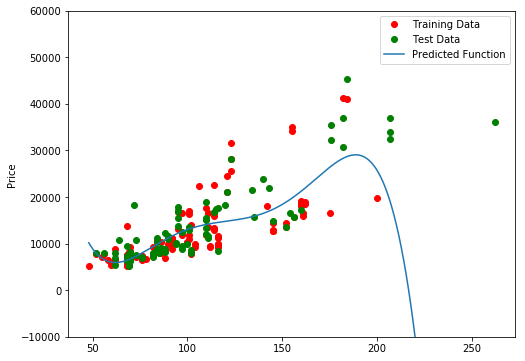

In [86]:
# The following interface allows you to experiment with different polynomial orders and different amounts of data.
interact(f, order=(0,6,1),test_data=(0.05,0.95,0.05))

In [87]:
# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two:
pr1 = PolynomialFeatures(degree=2)

In [88]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. 
# Hint: use the method "fit_transform":
# prepare the data
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [89]:
# check dimension
x_train_pr1.shape

(180L, 15L)

In [90]:
# create lr object and train the model
poly1 = LinearRegression()
poly.fit(x_train_pr1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# make prediction w/ test data
yh1_test = poly.predict(x_test_pr1)

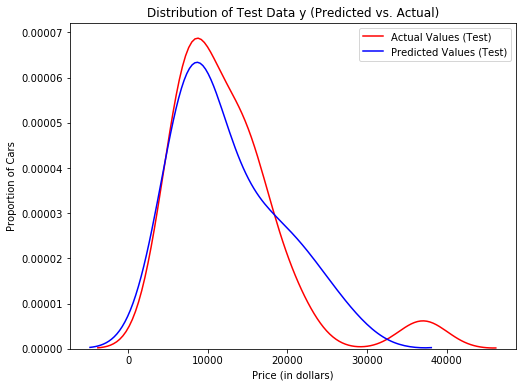

In [93]:
Title='Distribution of Test Data y (Predicted vs. Actual)'
Distributionplot(y_test,yh1_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### 3. Ridge Regression (Regularization in ML)

We will see how the parameter Alfa changes the model

In [104]:
# Let's perform a degree two polynomial transformation on our data: 
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [105]:
from sklearn.linear_model import Ridge

In [106]:
# Let's create a Ridge regression object, setting the regularization parameter to 0.1:
RM = Ridge(alpha=0.1)

In [107]:
RM.fit(x_train_pr,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
y_rm = RM.predict(x_test_pr)

In [109]:
# quick comparison
print('predicted:', y_rm[0:4])
print('test set :', y_test[0:4].values)

('predicted:', array([  6567.83081933,   9597.97151399,  20836.22326843,  19347.69543463]))
('test set :', array([  6295.,  10698.,  13860.,  13499.]))


In [110]:
# We select the value of Alfa that minimizes the test error. For example, we can use a for loop:
Rsqu_test=[]
Rsqu_train=[]
dummy1=[]
ALFA=5000*np.array(range(0,10000))
for alfa in ALFA:
    RM=Ridge(alpha=alfa) 
    RM.fit(x_train_pr,y_train)
    Rsqu_test.append(RM.score(x_test_pr,y_test))
    Rsqu_train.append(RM.score(x_train_pr,y_train))

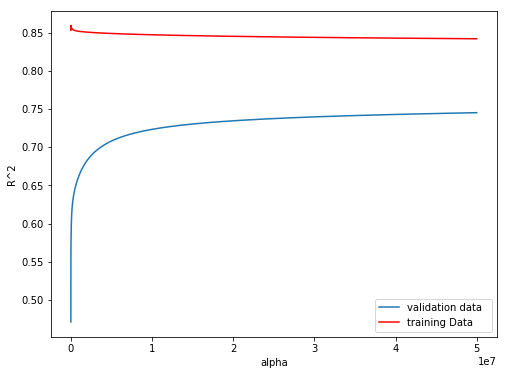

In [111]:
# We can plot out the value of R^2 for different Alphas:
width = 8
height = 6
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test,label='validation data  ')
plt.plot(ALFA,Rsqu_train,'r',label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()



In [131]:
# try alpha=10000000, alfter which the score for test set almost flatten
RigeModel1=Ridge(alpha=10000000)
RigeModel1.fit(x_train_pr,y_train)
RigeModel1.score(x_test_pr, y_test)

0.72359993127041922

### 4. Grid Search

The term Alfa is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection:

In [121]:
from sklearn.model_selection import GridSearchCV
print("done")

done


In [122]:
# We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [123]:
# create a ridge
RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
# create Grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [125]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)

GridSearchCV(cv=4, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [127]:
# find the best alpha
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [128]:
#check the score
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)

0.8411649831036152

Q: What is cv=4 in Grid1?

In [134]:
# check the cross-validation results
cv=Grid1.cv_results_
cv

{'mean_fit_time': array([ 0.01275003,  0.01250011,  0.01725006,  0.03675002,  0.02499998,
         0.02249998,  0.02574998,  0.02225   ,  0.01225001]),
 'mean_score_time': array([ 0.00225002,  0.00224996,  0.00924993,  0.00300002,  0.00275004,
         0.00374997,  0.00399995,  0.00449997,  0.00125003]),
 'mean_test_score': array([ 0.66548837,  0.66548894,  0.66549413,  0.66554568,  0.66602936,
         0.66896822,  0.67334636,  0.65781884,  0.65781884]),
 'mean_train_score': array([ 0.8140027 ,  0.8140027 ,  0.8140027 ,  0.81400267,  0.81399979,
         0.81387049,  0.81258374,  0.78954145,  0.78954145]),
 'param_alpha': masked_array(data = [0.001 0.1 1 10 100 1000 10000 100000 100000],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': ({'alpha': 0.001},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 10000},
  {'alpha': 100000},
  {'alpha': 100000}),
 'rank_test_score'

alpha = 10000 gives the highest mean and std score for test data.

In [129]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000]},{'normalize':[True,False]}]
parameters
R1=Ridge()
R1
Grid2 = GridSearchCV(R1, parameters1,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_
BR=Grid2.best_estimator_
BR
BR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_test)


0.8411649831036152